In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#load dataset

In [4]:
df=pd.read_csv('/content/Fraud_Detection_DataSet _reduce_dimension.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,8365.0,-0.655093,1.102283,1.610914,2.542440,0.928295,0.344427,0.340831,-0.004130,-0.039325,...,0.025710,0.297263,-0.195074,-0.476353,-0.269339,0.154728,-0.004028,0.155044,16.93,0.0
1,10222.0,-0.643681,0.953126,2.223666,1.134587,-0.198051,0.435065,0.221857,0.017773,1.931767,...,-0.066355,0.684519,-0.210179,0.036703,-0.126450,-0.199370,0.377610,0.033734,20.24,0.0
2,35866.0,-2.044489,3.368306,-3.937111,5.623120,-3.079232,-1.253474,-5.778880,1.707428,-4.467103,...,1.483594,0.834311,-0.148486,0.001669,-0.038996,0.389526,1.300236,0.549940,7.61,1.0
3,10836.0,1.020913,-0.400279,0.662579,0.341929,-0.656141,-0.021927,-0.386604,0.054592,1.820545,...,-0.131286,-0.065529,-0.067101,0.260703,0.253718,1.066000,-0.096361,-0.005774,79.95,0.0
4,69.0,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7807 entries, 0 to 7839
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7807 non-null   float64
 1   V1      7807 non-null   float64
 2   V2      7807 non-null   float64
 3   V3      7807 non-null   float64
 4   V4      7807 non-null   float64
 5   V5      7807 non-null   float64
 6   V6      7807 non-null   float64
 7   V7      7807 non-null   float64
 8   V8      7807 non-null   float64
 9   V9      7807 non-null   float64
 10  V10     7807 non-null   float64
 11  V11     7807 non-null   float64
 12  V12     7807 non-null   float64
 13  V13     7807 non-null   float64
 14  V14     7807 non-null   float64
 15  V15     7807 non-null   float64
 16  V16     7807 non-null   float64
 17  V17     7807 non-null   float64
 18  V18     7807 non-null   float64
 19  V19     7807 non-null   float64
 20  V20     7807 non-null   float64
 21  V21     7807 non-null   float64
 22  V22  

In [18]:
#class column float to integer
df['Class'] = df['Class'].astype(int)

In [6]:
df.shape

(7840, 31)

In [7]:
df.duplicated().sum()

33

In [8]:
#drop dupliacted row
df.drop_duplicates(inplace=True)

In [9]:
# Transpose the DataFrame to make columns as rows, then find duplicates
df.T.duplicated().any()

False

In [10]:
df.shape

(7807, 31)

In [11]:
df.isnull().sum().any()

False

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,...,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000
mean,9443.649417,-0.436814,0.413489,0.578029,0.444953,-0.180371,0.074206,-0.294652,-0.035723,0.651602,...,-0.034361,-0.137487,-0.036254,0.019833,0.086799,0.098741,0.014363,0.001628,67.451722,0.046369
std,19507.194865,2.236461,1.682550,2.422588,1.762550,1.742151,1.383522,2.121687,1.789300,1.409926,...,1.121266,0.682378,0.623942,0.592348,0.449030,0.558457,0.484982,0.290813,197.514934,0.210296
min,0.000000,-30.552380,-34.607649,-31.103685,-4.657545,-32.092129,-23.496714,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2150.000000,-1.088990,-0.193748,0.314940,-0.568822,-0.679079,-0.661088,-0.587833,-0.193103,-0.036704,...,-0.267493,-0.548436,-0.180768,-0.330416,-0.163971,-0.329575,-0.083994,-0.017408,5.000000,0.000000
50%,4995.000000,-0.402392,0.323344,0.891656,0.274674,-0.168197,-0.176988,-0.083192,0.019469,0.754503,...,-0.118897,-0.132129,-0.046623,0.078610,0.122494,0.040351,-0.000865,0.016253,15.950000,0.000000
75%,10849.000000,1.144429,0.976312,1.582042,1.252307,0.369963,0.476384,0.468555,0.301145,1.475420,...,0.050748,0.259911,0.083977,0.407795,0.362924,0.450571,0.142197,0.083894,53.730000,0.000000
max,170348.000000,2.132386,22.057729,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,27.202839,8.361985,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [23]:
y.value_counts()

,count
Class,
0,7445
1,362


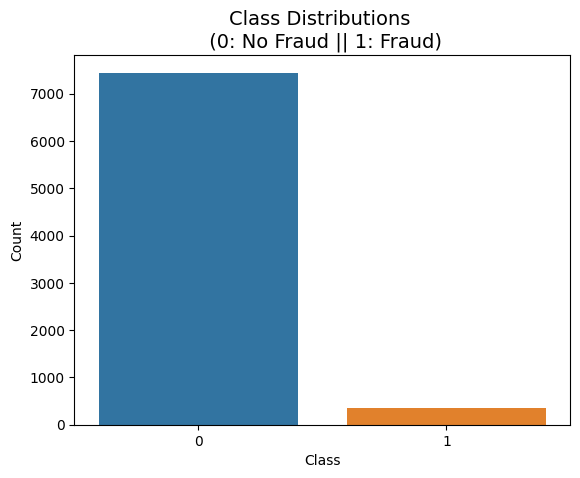

In [20]:
colors = ['#1f77b4', '#ff7f0e']
# Plotting the class distribution
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [21]:
# Separate features and label
X = df.drop(columns=['Class'])
y = df['Class']

In [32]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#PCA (Principal Component Analysis)

In [37]:
# Standardize the data (important for PCA and other methods)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [38]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [39]:
# Train a classifier (Random Forest in this case)
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

In [41]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_pca)
print("Accuracy:", accuracy)
print("PCA Performance:")
print(classification_report(y_test, y_pred_pca))

Accuracy: 0.9953051643192489
PCA Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2219
           1       0.99      0.92      0.95       124

    accuracy                           1.00      2343
   macro avg       0.99      0.96      0.98      2343
weighted avg       1.00      1.00      1.00      2343



#SelectKBest

In [45]:
# Apply SelectKBest
select_k_best = SelectKBest(mutual_info_classif, k=10)
X_train_best = select_k_best.fit_transform(X_train_sc, y_train)
X_test_best = select_k_best.transform(X_test_sc)

In [46]:
# Train classifier on selected features
clf_best = RandomForestClassifier(random_state=42)
clf_best.fit(X_train_best, y_train)
y_pred_best = clf_best.predict(X_test_best)

In [47]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy:", accuracy)
print("SelectKBest Performance:")
print(classification_report(y_test, y_pred_best))

Accuracy: 1.0
SelectKBest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2219
           1       1.00      1.00      1.00       124

    accuracy                           1.00      2343
   macro avg       1.00      1.00      1.00      2343
weighted avg       1.00      1.00      1.00      2343



#As per Accuracy best model here for feature reduction is "select_K_best" apply again on data then save it as per project requirement

In [48]:
X_scaled = scaler.fit_transform(X)

In [49]:
# Apply SelectKBest (keep top 10 features)
select_k_best = SelectKBest(mutual_info_classif, k=10)
X_reduced = select_k_best.fit_transform(X_scaled, y)

In [50]:
X_reduced

array([[-0.05529849,  0.42638313,  1.19010565, ...,  0.59900182,
         0.10182502,  0.24399806],
       [ 0.03990325,  0.67933216,  0.39129515, ...,  0.26419423,
        -0.49621068,  0.44052523],
       [ 1.35457933, -1.86388708,  2.93807103, ..., -4.2057384 ,
        -5.43444588, -6.64490014],
       ...,
       [-0.03161341,  0.46356246, -2.23541588, ...,  0.47819768,
         0.13792408, -0.06558271],
       [-0.37663642,  0.25983003, -1.4590023 , ...,  0.05833405,
        -0.30769015, -0.19907207],
       [-0.1378887 , -0.2949574 , -0.53292869, ...,  0.53800762,
         0.90614782,  0.29837396]])

In [61]:
# Get the selected feature names
selected_feature_indices = select_k_best.get_support(indices=True)
features_name= X.columns[selected_feature_indices]

In [63]:
features_name

Index(['Time', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')

In [62]:
# Create a DataFrame with the reduced features
X_reduced_df = pd.DataFrame(X_reduced, columns=features_name)

In [54]:
#add the y data set in X
X_reduced_df['Class'] = y

In [56]:
X_reduced_df.head()

,Time,V3,V4,V9,V10,V11,V12,V14,V16,V17,Class
0,-0.055298,0.426383,1.190106,-0.490076,0.382042,-0.591846,-0.788212,0.599002,0.101825,0.243998,0.0
1,0.039903,0.679332,0.391295,0.908024,0.174629,-0.473041,-0.646305,0.264194,-0.496211,0.440525,0.0
2,1.354579,-1.863887,2.938071,-3.630711,-3.143145,2.158312,-3.431424,-4.205738,-5.434446,-6.644900,1.0
3,0.071381,0.034903,-0.058456,0.829134,-0.108800,1.035895,0.078092,0.530506,-0.254731,0.460522,0.0
4,-0.480605,-0.875224,0.633429,-0.229081,0.316417,0.530656,0.697706,-2.250632,0.405083,1.228073,0.0


In [57]:
#copy reduce dataset df2
df2=X_reduced_df.copy()

In [59]:
# Save the reduced dataset to a CSV file
df2.to_csv('reduced_dataset.csv', index=False)
print("Reduced dataset saved as 'fraud_detection_reduced.csv'.")

Reduced dataset saved as 'fraud_detection_reduced.csv'.
